# 13 Visualization

## The Plot method 

- por default método <code>plot</code> renderiza un gráfico de línea
- el método <code>plot</code> por defecto incluye todas las columnas numéricas de un DF. Podemos elegir manualmente un subset/subconjunto con el  parámtro<code>y</code>
- Matplotlib utilizará los "index values" para el eje X y los valores para el eje Y.
- Matplotlib interpretará intervalos para los índices de fechas. Opciones completamente configurables. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  

In [3]:
ibm=pd.read_csv("ibm.csv", parse_dates=["Date"],index_col="Date" )
ibm.head()

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,5.04610,5.04610,4.98716,4.98716,593562.955237
1962-01-03,4.98716,5.03292,4.98716,5.03292,445175.034277
1962-01-04,5.03292,5.03292,4.98052,4.98052,399513.586679
1962-01-05,4.97389,4.97389,4.87511,4.88166,559321.480565
1962-01-08,4.88166,4.88166,4.75059,4.78972,833273.771393


<Axes: xlabel='Date'>

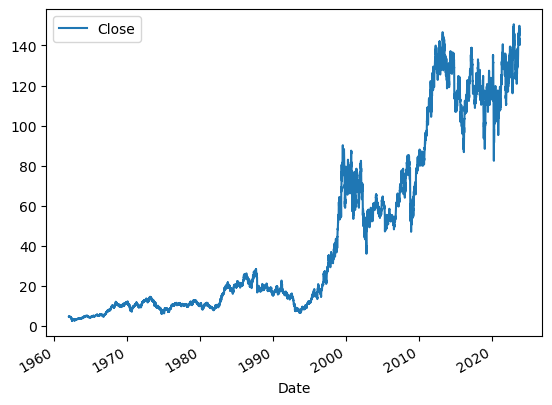

In [4]:
# utilizando el parámetro Y
ibm.plot(y="Close")


<Axes: xlabel='Date'>

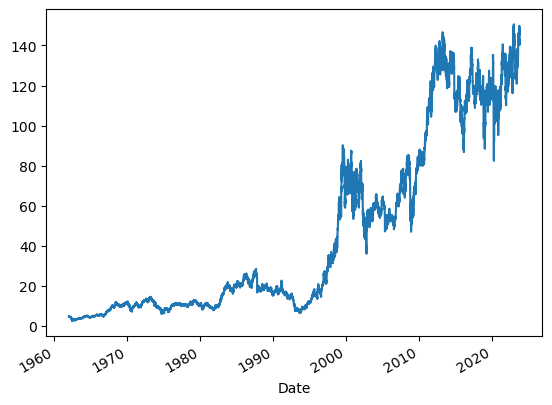

In [5]:

# alternativamente podemos elegir la columna al instanciar al DF
ibm["Close"].plot()

## Modiying plot aesthertics with templates

- el atributo<code> plt.style.aviable </code> retorna una lista de estilos disponibles
- el método  <code> plt.style.use</code> se utiliza entregandole el estilo seleccionado en formato string
- los siguientes gráficos que utilices implemntarán ese estilo.

In [6]:
# continuamos usando el DF ibm

# desplegamos las opciones disponibles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='Date'>

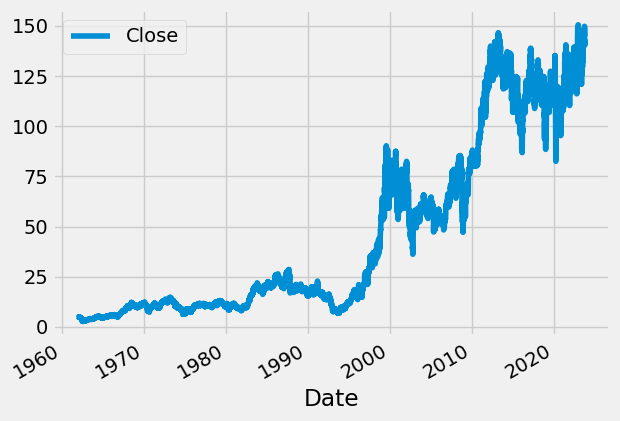

In [7]:
# seleccionamos el estilo deseado
plt.style.use("fivethirtyeight")
# graficamos
ibm.plot(y="Close")

<Axes: xlabel='Date'>

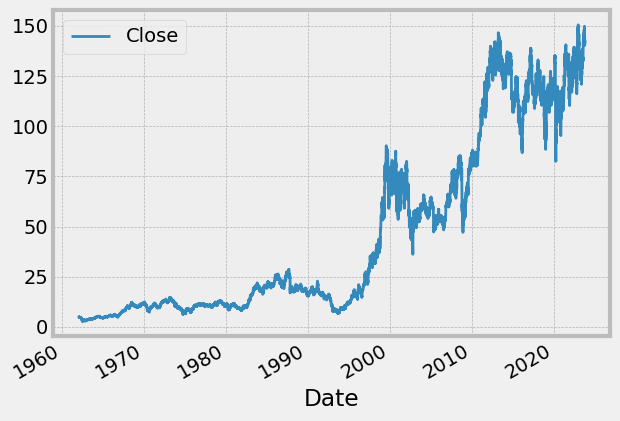

In [8]:
# seleccionamos el estilo deseado
plt.style.use("bmh")
# graficamos
ibm.plot(y="Close")

## Bar charts

- un gráfico de barra representa sucesos de las categorias(valores)
- podemos personalizar el tipo de gráfico a urtilizar con el parámetro <code> kind</code>
- seleccionamos <code>bar</code> para barras verticales y <code>barh </code> para barras horizontales

In [11]:
# creamos una funcion para crear categorias
def rank_performance (stock_price):
  if stock_price <=50:
     return "Poor"
  elif stock_price> 50 and stock_price <=100:
      return "Satisfactory"
  else:
      return "Excelent"
  
  
# aplicamos la funcion y contamos las categorias   
categorias = ibm["Close"].apply(rank_performance).value_counts()
categorias     


Close
Poor            9423
Excelent        3085
Satisfactory    3038
Name: count, dtype: int64

<Axes: ylabel='Close'>

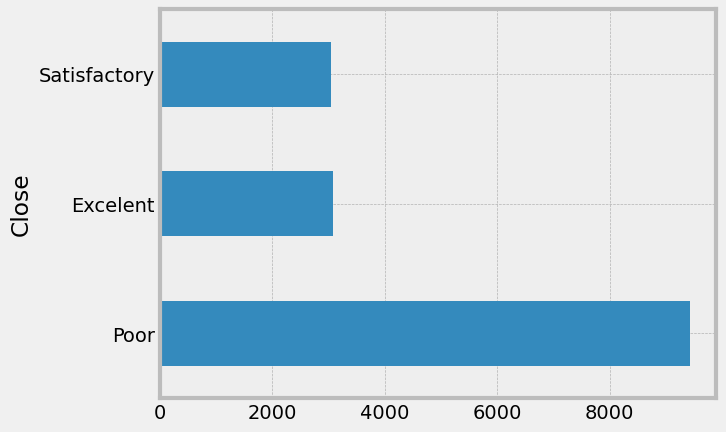

In [20]:
# graficamos
#categorias.plot(kind="bar")
categorias.plot(kind="barh")

In [17]:
# es posible realizar todos estos pasos juntos, ejemplo:
#ibm["Close"].apply(rank_performance).value_counts().plot(kind="bar")

## 

## Pie Charts

- se entrega el parámetro <code>kind</code> con el argumento <code>"pie"</code>
- el parámetro <code>legend</code> renderiza la legenda para identificar los colores y sus etiquetas

<Axes: ylabel='count'>

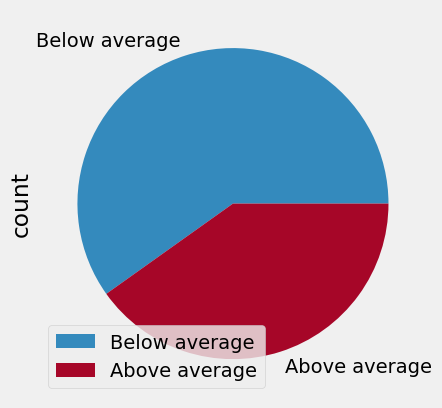

In [28]:
#creamos un valor escalar para nuesntra función
average_stock_price = ibm["Close"].mean()
# creamos una función
def rank_performance2 (stock_price):
    if stock_price >= average_stock_price:
      return "Above average"
  
    return "Below average"

ibm["Close"].apply(rank_performance2).value_counts().plot(kind="pie", legend=True)